In [1]:
import pyscan as ps
import numpy as np
import matplotlib.pyplot as plt

Could not load Keysight SD1
Could not load Keysight SD1
pylablib not found, AttocubeANC350 not loaded
Helios Camera not installed
msl not installed, Thorlabs BSC203 driver not loaded
seabreeze module not found, Ocean Optics not imported
Failed to load spinapi library.
spinapi is not installed, PulseBlaster driver not loaded.
Thorlabs Kinesis not found, ThorlabsBSC203 not loaded
Thorlabs Kinesis not found, ThorlabsBPC303 not loaded
Thorlabs Kinesis not found, ThorlabsMFF101 not loaded


In [2]:
# Setup as usual
devices = ps.ItemAttribute()

devices.v1 = ps.TestVoltage()
devices.v2 = ps.TestVoltage()


In [3]:
# Make a measure function

def generate_multiD_data(expt):
    """
    Generates fake data proportinal to loopX.i
    x1 - 0D data (point)
    x2 - 1D data (line/array)
    x3 - 2D data (2D array)
    """
     
    runinfo = expt.runinfo
    devices = expt.devices

    d = ps.ItemAttribute()

    v = runinfo.loop0.i + runinfo.loop1.i*runinfo.loop0.n + \
           runinfo.loop2.i*runinfo.loop0.n*runinfo.loop1.n + \
           runinfo.loop3.i*runinfo.loop0.n*runinfo.loop1.n*runinfo.loop2.n
    
    d.x1 = v
    d.x2 = [v for i in range(5)]
    d.x3 = [[v for i in range(5)] for j in range(5)]
    
    return d

In [4]:
# function to generate sparse points

from random import random, choices

def uniform_cartesian_points(runinfo, percent):
    
    sparse_points = np.zeros(runinfo.dims)
    n_points = np.prod(runinfo.dims)
    points = np.array(np.where(sparse_points==0)).T
    rand_points = choices(points, k=int(percent/100*n_points)) # k is number of random points to collect
    mask = tuple(map(tuple, np.array(rand_points).T))
    sparse_points[mask] = 1

    return sparse_points

In [5]:
# 2D sparse cartesian points
runinfo = ps.RunInfo()

runinfo.loop0 = ps.PropertyScan({'v1': ps.drange(0, 1, 41)}, prop='voltage', dt=0.01)
runinfo.loop1 = ps.PropertyScan({'v2': ps.drange(0, 1, 82)}, prop='voltage', dt=0.01)

runinfo.sparse_points = uniform_cartesian_points(runinfo, percent = 10)
runinfo.measure_function = generate_multiD_data

expt = ps.SparseSweep(runinfo, devices)

expt.start_thread()

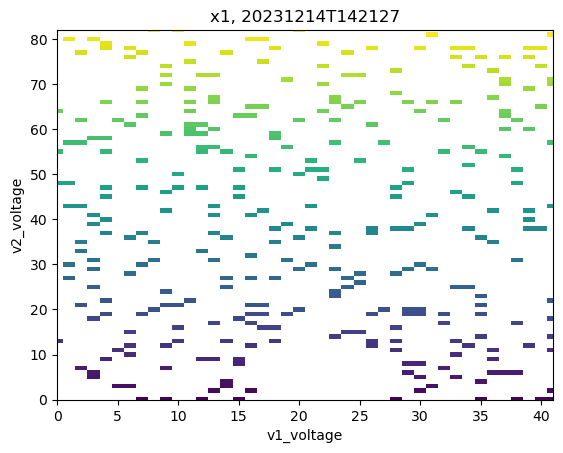

In [6]:
ps.live_plot2D(expt)